## Pipeline 的好處，可以從以下幾個關鍵點進行說明：

1. **簡化代碼**：
   - 使用 `Pipeline` 可以將數據預處理、特徵選擇、降維和模型訓練的步驟整合在一起，這樣就可用一行代碼來執行這些順序性的步驟，使代碼更加整潔、易於理解和維護。

2. **避免數據洩露**：
   - 在機器學習中，數據洩露是一個常見問題，特別是在數據預處理階段。`Pipeline` 確保預處理如標準化或正規化僅使用來自訓練數據的信息，並且每次交叉驗證的時候都是獨立處理，從而避免測試數據信息在模型訓練過程中被不當使用。

3. **便於進行模型選擇和調參**：
   - `Pipeline` 可以與 `GridSearchCV` 或 `RandomizedSearchCV` 結合使用，這讓我們可以同時對轉換器和預測器的參數進行調整。這種結合使用可以在模型選擇和超參數調整階段大大提高效率。

4. **提升模型的重用性和部署**：
   - 使用 `Pipeline` 可以將所有預處理步驟和預測模型封裝成單一對象，這使得模型從開發環境到生產環境的遷移更加順暢。此外，這種封裝還有助於確保在不同數據集上應用模型時，所有步驟都會按照相同的順序和方式執行。

5. **自動化工作流程**：
   - `Pipeline` 能夠自動處理在對新數據進行預測時所需的所有步驟，如轉換和預測，用戶只需調用 `fit` 和 `predict` 方法。這減少了手動錯誤的風險，提高了工作效率。

| 欄位名稱     | 描述                                       |
|--------------|--------------------------------------------|
| MedInc       | 每個街區戶主的收入中位數，單位為萬美元          |
| HouseAge     | 每個街區中房屋的年齡中位數                       |
| AveRooms     | 每個街區中的平均房間數（總房間數除以房屋數）    |
| AveBedrms    | 每個街區中的平均臥室數（總臥室數除以房屋數）    |
| Population   | 街區的人口總數                                |
| AveOccup     | 每個家庭的平均人口數（街區人口除以房屋數）      |
| Latitude     | 街區的地理緯度                                |
| Longitude    | 街區的地理經度                                |

這些數據主要用於分析加州各地區的房價情況，其中「MedInc」作為收入指標，以及地理位置「Latitude」和「Longitude」對房價有重要影響。這些信息可以用於預測房屋價格或進行房地產市場的經濟研究。

在 `fetch_california_housing` 數據集中，目標變量（房價）的單位是「十萬美元」。這意味著數據集中的房價數值表示的是房屋價格以十萬美元為單位的值。例如，一個房價目標值為 3.0 表示該房屋的價格是 300,000 美元。

In [105]:
import pandas as pd
df = pd.read_csv("./california_housing_data.csv")
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [106]:
X = df.drop("target",axis=1)
y = df["target"]

In [107]:
from sklearn.model_selection import train_test_split
# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## 建立管道

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression

In [109]:
pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("regression",LinearRegression())
])

In [110]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [111]:
from sklearn.metrics import mean_squared_error
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test,y_pred)

0.5289841670367208

## GridSearchCV and Pipline

In [112]:
import pandas as pd
df = pd.read_csv("./california_housing_data.csv")
X = df.drop("target",axis=1)
y = df["target"]

In [113]:
from sklearn.model_selection import train_test_split,GridSearchCV
# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import Ridge


In [115]:
pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("ridge",Ridge())
])

In [116]:
parameterd = {"ridge__alpha":[0.1,1.0,10.0,15,16,17,20,30]}
grid_search = GridSearchCV(pipeline,parameterd,cv=5)
grid_search.fit(X_train,y_train)
print("bas_params_:",grid_search.best_params_)

bas_params_: {'ridge__alpha': 17}


# KNN - K最近鄰居 - 分類

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv("./gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

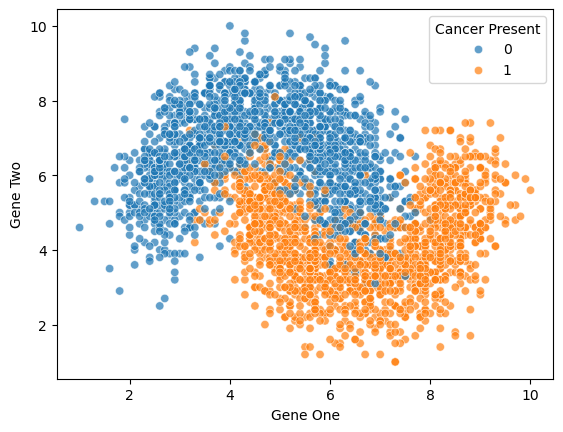

In [119]:
sns.scatterplot(x="Gene One",y="Gene Two",hue="Cancer Present",data=df,alpha=0.7)

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [121]:
X = df.drop("Cancer Present",axis=1)
y = df["Cancer Present"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn_mode = KNeighborsClassifier(n_neighbors=19)
knn_mode.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

## 預測

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
y_pred = knn_mode.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.9477777777777778

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("./gene_expression.csv")

In [127]:
X = df.drop("Cancer Present",axis=1)
y = df["Cancer Present"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [129]:
from sklearn.pipeline import Pipeline

In [130]:
oprations = [("scaler",scaler),
             ("knn",knn)]
pipe = Pipeline(oprations)

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [133]:
k_values = list(range(1,25))
param_grid = {"knn__n_neighbors":k_values}
cv_classfier = GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy")

In [134]:
cv_classfier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24]},
             scoring='accuracy')

In [135]:
cv_classfier.best_params_

{'knn__n_neighbors': 20}

In [136]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=20)
oprations = [("scaler",scaler),
             ("knn",knn)]
pipe = Pipeline(oprations)
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=20))])

In [137]:
pipe_pred = pipe.predict(X_test)

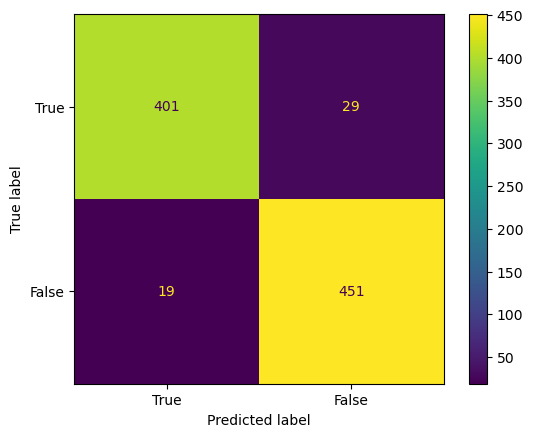

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,pipe_pred,labels=[1,0],
                                         display_labels=["True","False"])


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



## SVM

## gamma值的理解

- **gamma值越大**：
  - 模型會更加關注訓練數據中非常接近的資料點。
  - 因為模型更緊密地擬合這些局部數據，所以可能會導致過擬合（overfitting）。

- **gamma值越小**：
  - 模型會考慮更廣泛的資料範圍，訓練時更多地關注整體數據分佈。
  - 因此，模型更均勻地適應數據，但可能會導致欠擬合（underfitting），因為它忽略了數據中的一些細節。

這樣的表述能更清晰地傳達gamma值對模型的影響。

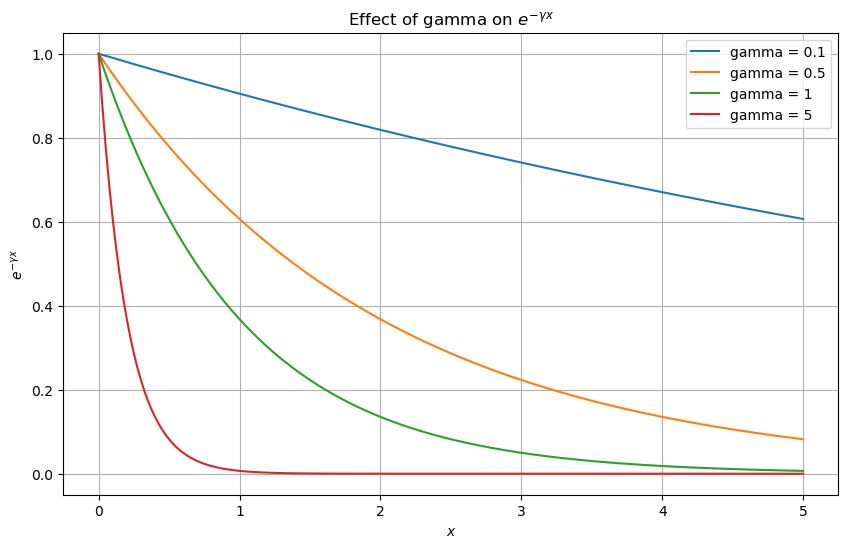

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# 定義 gamma 值
gamma_values = [0.1, 0.5, 1, 5]

# 定義 x 值範圍
x = np.linspace(0, 5, 400)

# 創建圖形
plt.figure(figsize=(10, 6))

# 繪製不同 gamma 值對應的 e^(-gamma * x) 曲線
for gamma in gamma_values:
    y = np.exp(-gamma * x)
    plt.plot(x, y, label=f'gamma = {gamma}')

# 添加圖例和標籤
plt.title('Effect of gamma on $e^{-\gamma x}$')
plt.xlabel('$x$')
plt.ylabel('$e^{-\gamma x}$')
plt.legend()
plt.grid(True)

# 顯示圖形
plt.show()

# 探索支持向量機（Support Vector Machines, SVM）

**注意：在這個範例中，我們將探討算法，所以我們將跳過數據標準化和訓練/測試拆分，而是看看各種參數如何改變SVM（在分類中最容易視覺化效果）**

[關於SVM的優秀論文鏈接](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)
* A tutorial on support vector regression by ALEX J. SMOLA and BERNHARD SCHOLKOPF

## SVM - 分類

### 簡介
支持向量機（Support Vector Machines，SVM）是一種監督學習模型，通常用於分類和回歸分析。SVM的目標是找到一個最佳的超平面來將數據點分開，這個超平面可以最大化邊界（即支持向量）。

### 參數
在探索SVM的過程中，有幾個重要的參數需要理解和調整：
1. **核函數（Kernel Function）**：核函數將低維空間的數據轉換到高維空間，使得數據在高維空間中更容易分離。常見的核函數包括線性核、多項式核和高斯徑向基核（RBF核）。

2. **C參數（正則化參數）**：C值控制的是誤分類的懲罰程度。較小的C值會產生一個更平滑的決策邊界，但可能會容忍更多的誤分類；較大的C值會努力正確分類所有訓練樣本，但可能導致過擬合。

3. **γ參數（gamma）**：γ參數適用於多項式核和RBF核。γ值決定了單個訓練樣本的影響範圍。較大的γ值會使得決策邊界更加複雜，較小的γ值會使得決策邊界更平滑。

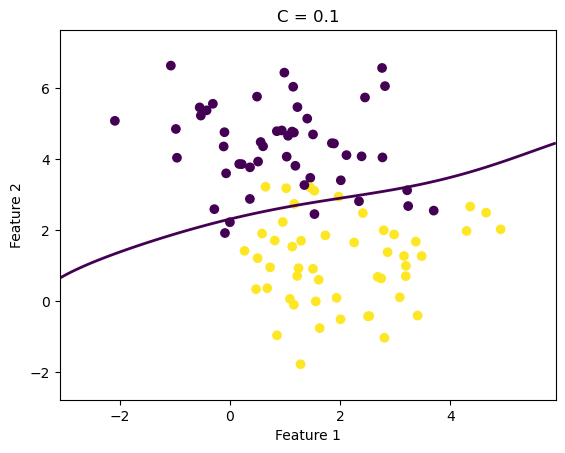

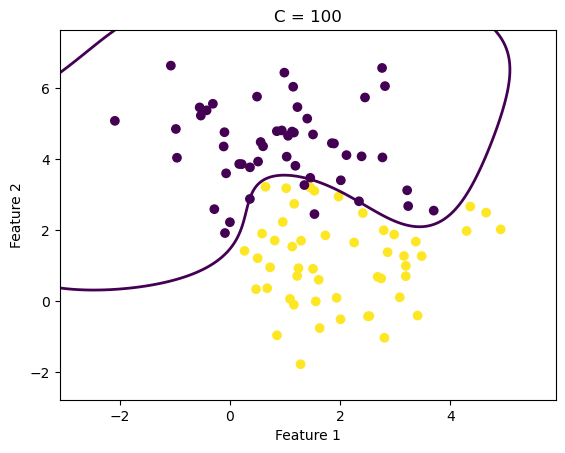

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

# Compare decision boundaries for small and large C values
#gamma='scale' 會根據資料特徵的「維度」和「變異程度」自動調整，
for C in [0.1, 100]:
    clf = SVC(kernel='rbf', C=C, gamma='scale')
    clf.fit(X, y)
    
    # Create a mesh to plot decision boundary
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contour(xx, yy, Z, levels=[0], linewidths=2)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(f'C = {C}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


## 數據
這裡顯示的數據模擬了一項醫學研究，在該研究中，被病毒感染的小鼠被給予不同劑量的兩種藥物，然後在兩週後檢查它們是否仍然被感染。根據這些數據，我們的目標是創建一個分類模型，預測（給定兩個劑量測量值）小鼠是否仍然會被病毒感染。

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv("./mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

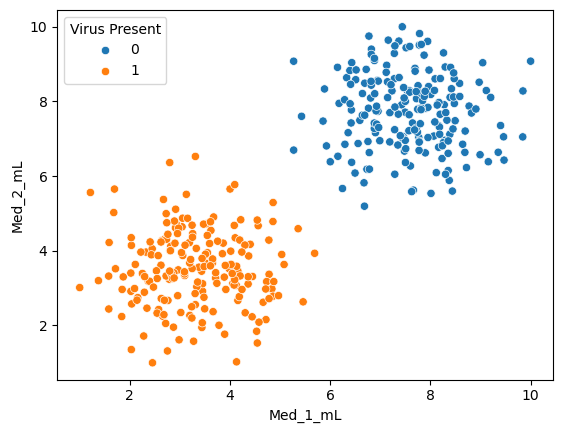

In [144]:
sns.scatterplot(x="Med_1_mL",y="Med_2_mL",hue="Virus Present",data=df)

In [145]:
from sklearn.svm import SVC
y = df["Virus Present"]
X = df[["Med_1_mL","Med_2_mL"]]


In [146]:
model = SVC(kernel="linear",C=0.01)
model.fit(X,y)

SVC(C=0.01, kernel='linear')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


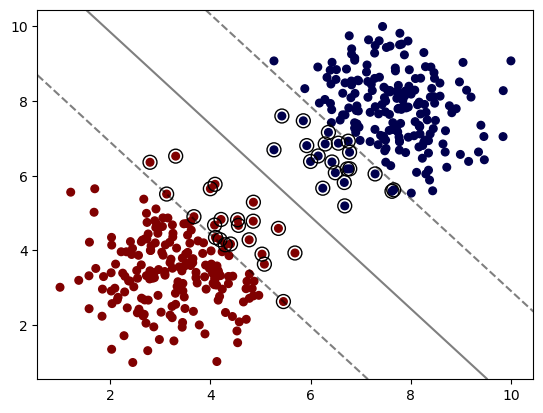

In [147]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(model,X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


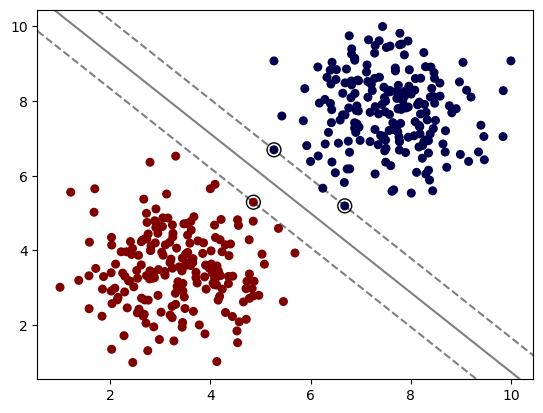

In [148]:
model = SVC(kernel="linear",C=10)
model.fit(X,y)
plot_svm_boundary(model,X,y)

## 非線性分類

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


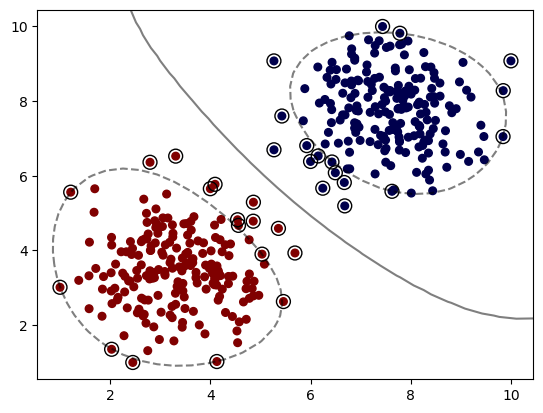

In [149]:
model = SVC(kernel="rbf",C=0.2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


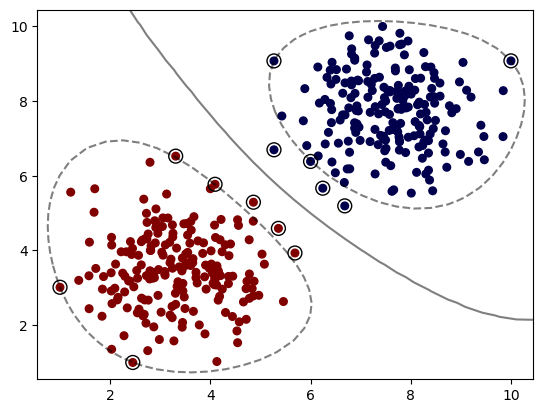

In [150]:
model = SVC(kernel="rbf",C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


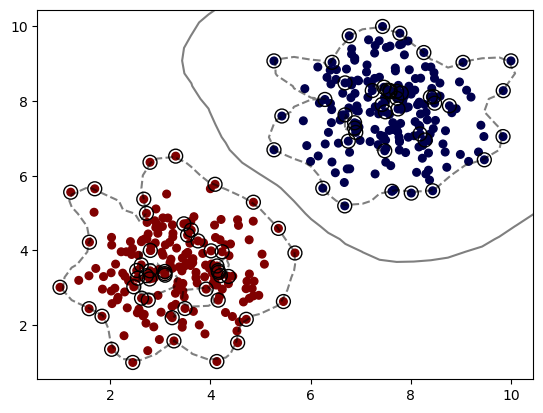

In [151]:
model = SVC(kernel="rbf",C=1,gamma=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


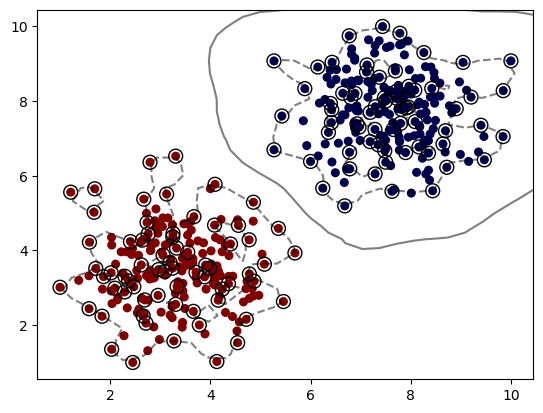

In [152]:
model = SVC(kernel="rbf",C=1,gamma=2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

## 網格搜索

In [153]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {"C":[0.01,0.1,1],"gamma":[0.01,0.1,1],"kernel":["linear","rbf"]}
grid = GridSearchCV(svm,param_grid,cv=5)
grid.fit(X,y)
grid.best_params_

{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)
svm = SVC()
param_grid = {"C":[0.01,0.1,1],"gamma":[0.01,0.1,1,2,30],"kernel":["linear","rbf"]}
grid = GridSearchCV(svm,param_grid,cv=5)
grid.fit(X,y)
grid.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}

# Support Vector Machines
## SVM - Regression

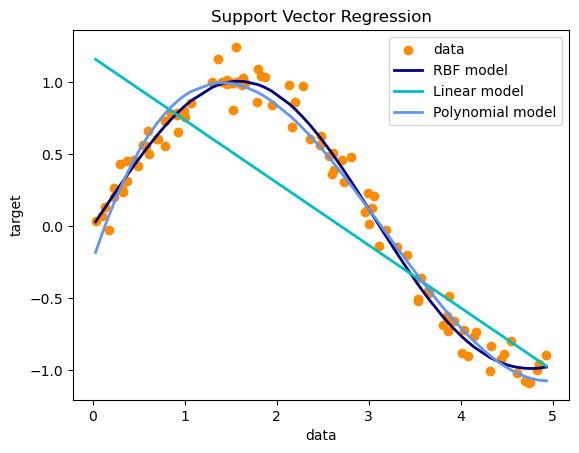

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# 生成示例數據
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# 訓練 SVR 模型
#epsilon 就像是「容錯帶」的寬度，寬就大方向對就好，窄就連小差錯都不放過
#coef0 就像是在「核函數」裡加的基礎高度
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, epsilon=.1)
#poly 多項式核函數
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# 擬合數據
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# 繪圖
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(X, y_lin, color='c', lw=2, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Model accuracy: 1.00


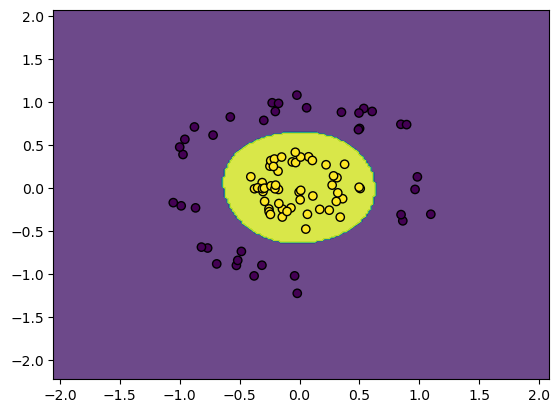

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成圓形的數據集
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 創建 SVM 模型
model = SVC(kernel='rbf', C=1)
model.fit(X_train, y_train)

# 使用測試集進行預測
y_pred = model.predict(X_test)

# 計算模型準確度
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

# 繪製決策邊界
def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# 繪製分類結果
plot_decision_boundary(model, X_test, y_test)

## CountVectorizer

在使用 CountVectorizer 時，
指定 stop_words='english' 會自動移除英文中的常見停用詞（stop words），
例如 "this" 和 "is"。停用詞是一些在文本分析中不具有區分度的常見單詞，例如冠詞、連詞和一些代詞。這些單詞通常對文本的主題或意圖沒有太大的貢獻，所以在計算特徵時會被移除。

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [ ]:
text = ['This is a line',

           "This is another line",
           
       "Completely different line"]

In [ ]:
cv = CountVectorizer(stop_words='english')
counts = cv.fit_transform(text)
counts.todense()

matrix([[0, 0, 1],
        [0, 0, 1],
        [1, 1, 1]], dtype=int64)

In [ ]:
cv.vocabulary_

{'line': 2, 'completely': 0, 'different': 1}


簡單來說，`TfidfTransformer` 就是一個「幫字詞打分數」的工具，它會把你原本的詞頻（也就是某個字在文件中出現了多少次）轉換成更有區別度的「TF–IDF 分數」。

1. **TF（Term Frequency，詞頻）**：衡量一個詞在一篇文件裡出現的頻率。出現越多，原始分數越高。
2. **IDF（Inverse Document Frequency，逆文件頻率）**：衡量一個詞在整個語料庫（所有文件）中有多「罕見」。如果一個詞在很多文件裡都出現（像「的」、「是」這種常見字），它的 IDF 會很低；只有少數文件裡才出現的詞（像「電腦視覺」、「隨機森林」）IDF 會比較高。

`TfidfTransformer` 會把這兩者「相乘」：

$$
\text{TF–IDF}(t, d) = \text{TF}(t, d) \times \log\frac{N}{\text{DF}(t)}
$$

* $t$ 是詞，$d$ 是文件
* $N$ 是文件總數，$\text{DF}(t)$ 是包含詞 $t$ 的文件數

**為什麼要這麼做？**

* 把在特定文件中很重要（頻繁出現），但在整體語料庫中又很少見的詞，打上高分。
* 把那些雖然在文件裡出現很多次，卻在所有文件裡都常見的詞，打上低分。

這樣一來，你在做後續機器學習或相似度比對時，就能更容易「抓到」那些真正能區分文件意義的關鍵字，而不是被高頻的「停用詞」干擾。


**舉例TF-IDF應用**

我會根據用戶問題提供一個實際的例子，用來解釋TF-IDF。這方面，我可以探討像是“蘋果手機”這類專有名詞，出現在某些文檔中頻繁卻重要性較高的詞彙；而“的”這類中文常見停用詞，雖然出現頻繁，但TF-IDF值會較低。為了更清楚，我可以展示一個小範例，通過簡單的數字來說明這些詞彙在TF-IDF計算中的表現。

**說明TF-IDF範例**

我可以舉兩個例子來區分“常出現但不重要”和“常出現但重要”的詞彙。“的”在所有文檔中都會出現，因此IDF很低，TF高，但TF-IDF低；而“蘋果手機”在第一篇文檔中出現兩次，其他文檔比較少，也因此TF和IDF都較高，因此TF-IDF較高。簡單來說，“蘋果手機”在特定文檔中出現頻繁且重要，而“的”雖然常見卻對於區分意圖的文檔來說沒有重要性。

**解釋TF-IDF範例**

“常出現但不重要”如“的”這樣的停用詞，通常在所有文檔中頻繁出現，IDF很低，因此TF-IDF並不高。而如“Quibli”，它在特定領域的文章中頻繁出現但在其他地方很少見，IDF則高，TF-IDF就會很高，顯示它對該文章很重要。另外，如果在不同運動領域的文章中，像“湖人”這樣的詞彙可能顯得很重要，若只在拳擊文章中出現，每篇都帶來高TF-IDF。


已思考 29 秒鐘


以下用一個簡單的「籃球賽報導」小語料庫舉例，說明兩類「常出現」的詞：

1. **常出現但不重要**（停用詞／泛用詞）
2. **常出現且重要**（能區分本文主題的關鍵詞）

---

## 語料庫（共 3 篇短文）

* **Doc1（湖人隊比賽）**

  > 「湖人 在 今晚 的比賽 中 以 102：98 戰勝 勇士，球員的表現 出色。」

* **Doc2（勇士隊新聞）**

  > 「勇士 球隊球員今季新秀的表現 穩定，但 在 防守 端 仍 有 改善 空間。」

* **Doc3（一般體育新聞）**

  > 「今年的體育 賽事 因 為 天候 的影響 而 延期，眾多 球迷 只能 在 電視 前 觀賽。」

設 $N=3$。計算幾個詞在 **Doc1** 中的 TF–IDF：

|  詞彙 | Doc1 中 TF | DF（出現過的文件數） | IDF = $\log\frac{N}{\text{DF}}$ |  TF–IDF = TF × IDF |         分類        |
| :-: | :-------: | :---------: | :-----------------------------: | :----------------: | :---------------: |
|  的  |     2     |      3      |       $\log\frac{3}{3}=0$       |    $2\times0=0$    |    常見停用詞 → 不重要    |
|  球員 |     1     |      2      |   $\log\frac{3}{2}\approx0.18$  | $1\times0.18=0.18$ | 常見詞，但多篇都有提 → 不太區分 |
|  湖人 |     1     |      1      |   $\log\frac{3}{1}\approx1.10$  | $1\times1.10=1.10$ |     本文主題 → 重要     |
|  戰勝 |     1     |      1      |   $\log\frac{3}{1}\approx1.10$  | $1\times1.10=1.10$ |     本文事件 → 重要     |

* **「的」**：停用詞，雖然在 Doc1 出現 2 次（TF 高），但因為在所有 3 篇都出現（DF=3），IDF=0，最終 TF–IDF=0 → 不重要。
* **「球員」**：在 Doc1 出現 1 次，但同時 Doc2 也提到（DF=2），IDF 約 0.18，所以 TF–IDF 也很低 → 雖「常出現」，卻不具辨別力。
* **「湖人」、「戰勝」**：都只在 Doc1 出現（DF=1），IDF≈1.10，TF–IDF≈1.10 → 不僅常出現，而且是報導的核心詞，分數高 → 重要。

---

### 小結

* **常出現但不重要**：像「的」、「球員」，即使在一篇文中頻繁出現，因為在多篇文都會出現，IDF 低、TF–IDF 低 → 適合視為停用或次要詞。
* **常出現且重要**：像「湖人」、「戰勝」，在目標文件中頻繁出現，但在整體語料庫中少見，IDF 高、TF–IDF 高 → 最能凸顯該文件獨特內容。